## Question 1 

La fonction d'utilité est donné par:
$$u(C,N) = \left(\alpha*C^{\rho} + (1-\alpha)*N^{\rho} \right)^{\tfrac{1}{\rho}} $$

étant donnée la contrainte 

$$ PcC+ PnN ≤ I $$

#  On considère la situation initale:

In [74]:
pc= 2
pn= 1
alpha=0.7
rho=0.5
I=100

 Les demandes marshalliennes sont donnée par 

$$ C^*(pC,pN,{\alpha},{\rho},I) $$
$$ Y^*(pC,pN,\alpha,\rho, I) $$

In [59]:
def u(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return subs**(1/rho)

def C_star(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return (1/rho)*(subs**(1/rho-1))*rho*(alpha*c**(rho-1.0))
    
def N_star(c,n,alpha,rho):
    sub = ((1-alpha)*n**rho)
    subs = (alpha*c**rho)+sub
    return (1/rho)*(subs**(1/rho-1))*rho*((1-alpha)*n**(rho-1.0))

In [76]:
def cstar(pc,pn,alpha,rho,I):
  r = rho/(rho-1)
  sub = pc**(r-1)* (1-alpha)**(r-1)
  denom = (pc**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom

  
def nstar(pc,pn,alpha,rho,I):
  r = rho/(rho-1)
  sub = (pn*alpha)**(r-1)
  denom = (pc**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom



qt_c = cstar (pc,pn,alpha,rho,I)
qt_n = nstar (pc,pn,alpha,rho,I)

print('La quantité pour les biens à forte intensité en carbonne est de', qt_c)
print('La quantité pour les autres bien est de', qt_n)

La quantité pour les biens à forte intensité en carbonne est de 36.56716417910447
La quantité pour les autres bien est de 26.865671641791053


## Question 2 . l'élasticité revenu des biens à fort intensité carbone. 

La part de chaque type de bien dans le budget

In [79]:
def Sc (pc,pn,alpha,rho,I):
    return (pc*(cstar(pc,pn,alpha,rho,I))/I*100)

def Sn (pc,pn,alpha,rho,I):
    return (pn*(nstar(pc,pn,alpha,rho,I))/I*100)

Budget_c = Sc(pc,pn,alpha,rho,I)
Budget_n = Sn(pc,pn,alpha,rho,I)

print ('le Budget des biens à forte intensité en carbonne est de', Budget_c)
print ('Le budget des autres biens est de', Budget_n)

le Budget des biens à forte intensité en carbonne est de 73.13432835820895
Le budget des autres biens est de 26.865671641791057


## Question 3. Étude sur l'imposation de taxes sur la consommation de biens intensifs en carbone.

a) Le nouveau prix des biens intensifs en carbone
$$ Pc*(1+\gamma) $$


$\gamma$ = 0,1 
$$  𝑝̂c = 2*(1+0,1) = 2,2 $$

La nouvelle situation :
* $\alpha$ = 0.7
* $\rho$  = 0.7
* pc = 2
* 𝑝̂c = 2.2
* pn = 1
* I = 100 

In [80]:
def cstar_taxe(pc,γ,pn,alpha,rho,I):
  r = rho/(rho-1)
  pc_taxe = pc*(1+γ)
  sub = pc_taxe**(r-1)*(1-alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom


  
def nstar_taxe(pc,γ,pn,alpha,rho,I):
  r = rho/(rho-1)
  pc_taxe = pc*(1+γ)
  sub = (pn*alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return I * sub/denom


qt_c = cstar_taxe (pc,γ,pn,alpha,rho,I)
qt_n = nstar_taxe (pc,γ,pn,alpha,rho,I)

print('La nouvelle quantié des biens intensif en carbonne est de', qt_c)
print('La nouvelle quantité des autres bien est de', qt_n)

La nouvelle quantié des biens intensif en carbonne est de 32.37315010570824
La nouvelle quantité des autres bien est de 28.77906976744187


b) l'impact de l'introduction de la taxe dur la proportion des biens carbones dans le budget

In [82]:
def Sc_taxe(pc,γ,pn,alpha,rho,I):
    pc_taxe = pc*(1+γ)
    return (pc_taxe*(cstar(pc_taxe,pn,alpha,rho,I))/I*100)

Budget_c = Sc_taxe(pc,γ,pn,alpha,rho,I)


print ('Le budget avec le changement de prix est de', Budget_c)
print ('Avec une introduction de la taxe de 10%, le budget des biens carbonnes passe de 73.13% à 71.22%',)

Le budget avec le changement de prix est de 71.22093023255813
Avec une introduction de la taxe de 10%, le budget des biens carbonnes passe de 73.13% à 71.22%


c) La variation de la part du bien èa forte intensité de carbone dans le budget en fonction de $\gamma$

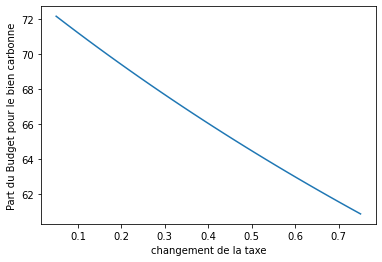

In [64]:
import numpy as np 
dpcs = np.linspace(0.05,0.75,30)

Budgets_c = [Sc_taxe(2,γ,1,0.7,0.5,100) for γ in dpcs]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dpcs,Budgets_c)
plt.xlabel('changement de la taxe')
plt.ylabel('Part du Budget pour le bien carbonne')
plt.show()


## Question 4. La compensation 

Rappel de la situation après taxe

In [83]:
pc= 2
γ= 0.1
pn= 1
alpha=0.7
rho=0.5
I=100

In [84]:
#La compensation
def vstar (pc,pn,alpha,rho,I):
    sub = 1/rho
    C = (alpha*cstar(pc,pn,alpha,rho,I)**rho)
    N = ((1-alpha)*nstar(pc,pn,alpha,rho,I)**rho)
    return (C+N)**sub

def slack(cmp,pc,γ,pn,alpha,rho,I):
   return vstar(pc,pn,alpha,rho,I) - vstar((pc+γ),pn,alpha,rho,(I+cmp))



from scipy.optimize import bisect
def compens(pc,γ,pn,alpha,rho,I):
  return bisect(slack,0,I,args=(pc,γ,pn,alpha,rho,I))


cmp = compens(pc,γ,pn,alpha,rho,I)

print (cmp)


3.608247422680222


Graphique des compensations pour des valeur de $\gamma$ entre 0.5 et 0.75

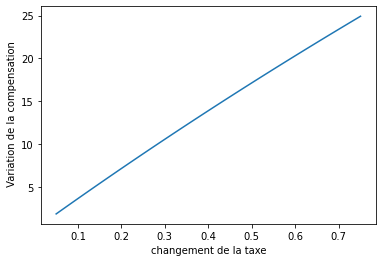

In [85]:
import numpy as np 
dtpc = np.linspace(0.05,0.75,30)

Compenses = [compens(2,γ,1,0.7,0.5,100) for γ in dtpc]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dpcs,Compenses)
plt.xlabel('changement de la taxe')
plt.ylabel(' Variation de la compensation')
plt.show()

Comparaison de l'utilié initial et l'utilié compensation

In [71]:
Uinitial = vstar(pc,pn,alpha,rho,I)
Ucompense = vstar((pc+γ),pn,alpha,rho,(I+cmp))

print (Uinitial)
print (Ucompense)

33.5
33.499999999999936


## Question 5. 

In [87]:
def cstar_cmp(pc,γ,pn,alpha,rho,I):
  Icmp = compens(pc,γ,pn,alpha,rho,I)+I
  pc_taxe = pc*(1+γ)
  r = rho/(rho-1)
  sub = pc_taxe**(r-1)*(1-alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return Icmp * sub/denom


def nstar_cmp(pc,γ,pn,alpha,rho,I):
  Icmp = compens(pc,γ,pn,alpha,rho,I)+I
  pc_taxe = pc*(1+γ)
  r = rho/(rho-1)
  sub = (pn*alpha)**(r-1)
  denom = (pc_taxe**r*(1-alpha)**(r-1) + pn**r*alpha**(r-1))
  return Icmp * sub/denom


qtc_initial = cstar (pc,pn,alpha,rho,I)
qtc_taxe = cstar_taxe (pc,γ,pn,alpha,rho,I)
qtc_cmp = cstar_cmp (pc,γ,pn,alpha,rho,I)

print ('La quantié de bien à forte intenté en carbonne est initiallement de', qtc_initial)
print ('Avec la taxe de 10%, la nouvelle quantité pour le bien en carbonne est de', qtc_taxe)
print ('Avec la compensation du gouvernement de 3,60%, la nouvelle quantité du bien en carbonne est de', qtc_cmp)


La quantié de bien à forte intenté en carbonne est initiallement de 36.56716417910447
Avec la taxe de 10%, la nouvelle quantité pour le bien en carbonne est de 32.37315010570824
Avec la compensation du gouvernement de 3,60%, la nouvelle quantité du bien en carbonne est de 33.54125346003786


La variation de la quantité des biens en carbonnes

In [73]:
delta_c= ((qtc_cmp - qtc_initial)/qtc_initial)*100

print (delta_c)
print ('une taxe de 10%, engendre une baisse de 8,27% de la demande des biens à forte intensité en carbone')

-8.27493951744748
une taxe de 10%, engendre une baisse de 8,27% de la demande des biens à forte intensité en carbone


## Question 6.
 Impact net en matière de revenu du gouvernement d'imposer une taxe $\gamma$ et de la dépense de cette compensation

In [91]:
revenu= pc*γ*qtc_cmp
depense = cmp

print ('le revenu avec imposition de taxe est', revenu)
print ('La dépense de la compensatoin est', depense)
print (revenu/depense)

le revenu avec imposition de taxe est 6.708250692007572
La dépense de la compensatoin est 3.608247422680222
1.8591437632136252


## Question 7. 

Varitation de la variable $\alpha$

In [ ]:
alphas = np.linspace(0.1,0.99,30)

alpha_variation = [(2,γ,1,0.7,0.5,100) for γ in dtpc]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(dpcs,Compenses)
plt.xlabel('changement de la taxe')
plt.ylabel(' Variation de la compensation')
plt.show()